<a href="https://colab.research.google.com/github/Purnimathakur89/Cpp-/blob/main/NLP_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing datasets from kaggle

In [ ]:
#install Kaggle
!pip install -q Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"purnimathakur89","key":"b955a2d4d1ffd285b44274587f763dbc"}'}

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

In [ ]:
#Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all datasets in kaggle
!kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          22236        445  0.9411765        
sukhmandeepsinghbrar/housing-price-dataset                  Housing Price Dataset                          780KB  2024-04-04 19:45:43            998         24  1.0              
fatemehmehrparvar/obesity-levels                            Obesity Levels                                  58KB  2024-04-07 16:28:30            644         24  0.88235295       
datascientist97/e-commerece-sales-data-2024                 E-commerece Sales Data 2024                  

In [ ]:
!kaggle datasets download -d columbine/imdb-dataset-sentiment-analysis-in-csv-format

 66% 17.0M/25.7M [00:00<00:00, 75.0MB/s]
100% 25.7M/25.7M [00:00<00:00, 81.9MB/s]


After Downloading unzipeed the dataset

In [ ]:
!unzip /content/imdb-dataset-sentiment-analysis-in-csv-format.zip

Archive:  /content/imdb-dataset-sentiment-analysis-in-csv-format.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: Valid.csv               


# `Installing IMDB datasets and import required files `

In [ ]:
!pip install datasets
import pandas as pd
import time
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, matthews_corrcoef, cohen_kappa_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load IMDb test dataset using datasets library
from datasets import load_dataset
imdb_test_dataset = load_dataset("imdb", split="test")

print(imdb_test_dataset[0])




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

In [ ]:
models=["wrmurray/roberta-base-finetuned-imdb",
    "JiaqiLee/imdb-finetuned-bert-base-uncased"]

What are the dataset splits that you have used? In what proportion did you split your dataset?
Dataset splits divided into subsets for training, validation, and testing.
It splits the data equally into validation and test data, resulting in a 60% training set, 20% validation set, and 20% test set

In [ ]:
data = pd.read_csv('/content/Test.csv')

In [ ]:
data = pd.read_csv('/content/Train.csv')

In [ ]:
data = pd.read_csv('/content/Valid.csv')

In [ ]:
# Read the data from the CSV file into a variable called 'data'
data = pd.read_csv('/content/Test.csv')

# Filter the data to include only rows where the 'text' column has less than 512 characters
newDf = data[data['text'].apply(lambda x: len(x) < 512)]

# Print the first few rows of the new DataFrame
newDf.head()

,text,label
16,"I felt asleep, watching it!!! (and I had ticke...",0
22,This is a funny film and I like it a lot. Cary...,1
23,This movie makes me want to fall in love all o...,1
41,A few words for the people here in germen's ci...,0
50,This movie is simply awesome. It is so hilario...,1


# Snippet code to extracts text and label data from a dataframe

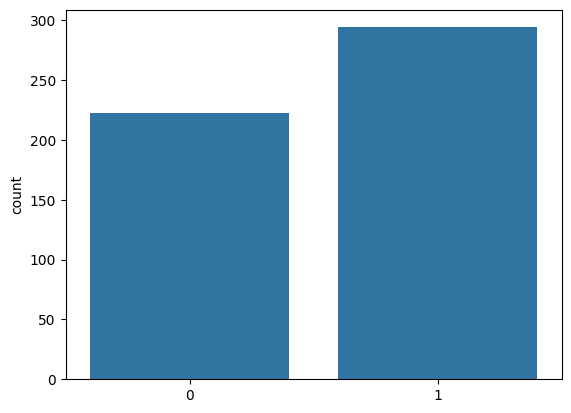

In [ ]:
texts = newDf.text.tolist()
labels = newDf.label.tolist()
sns.countplot(x=labels)
plt.show()

In [ ]:
FORMAT_LABELS = {
    'label_0': 0,
    "label_1": 1,
    "positive": 1,
    "negative": 0,
    'neg': 0,
    'pos': 1
}

# evaluate_model function

In [ ]:
def evaluate_model(model_name, epochs=3):
    results = []

    for epoch in range(1, epochs+1):
        print(f"Epoch {epoch}:")
        print('model initialized')
        pipe = pipeline("text-classification", model=model_name)
        start_time = time.time()
        res = pipe(texts)
        end_time = time.time()

        predicted_labels = list(map(lambda x: FORMAT_LABELS.get(x['label'].lower(), 0), res))
        probs = [item['score'] for item in res]
        print('Calculate evaluation metrics')
        # Calculate evaluation metrics
        accuracy = accuracy_score(labels, predicted_labels)
        logloss = log_loss(labels, probs)

        # Calculate training time
        training_time = end_time - start_time

        results.append({
            "Epoch": epoch,
            "Model": model_name,
            "Accuracy": accuracy,
            "Time (s)": training_time,
            'Log Loss': logloss,
        })

    return results

In [ ]:
results_bert = evaluate_model(models[1])
results_roberta = evaluate_model(models[0])

Epoch 1:
model initialized


config.json:   0%|          | 0.00/795 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Calculate evaluation metrics
Epoch 2:
model initialized
Calculate evaluation metrics
Epoch 3:
model initialized
Calculate evaluation metrics
Epoch 1:
model initialized


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Calculate evaluation metrics
Epoch 2:
model initialized
Calculate evaluation metrics
Epoch 3:
model initialized
Calculate evaluation metrics


# Accuracy plot ( Epoch vs Accuracy)

Text(0, 0.5, 'Accuracy')

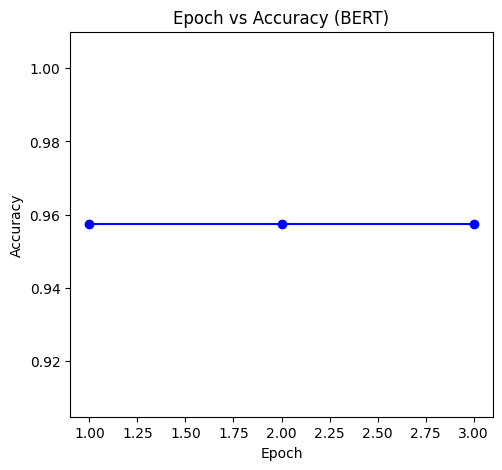

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy plot for BERT
plt.subplot(1, 2, 1)
epochs_bert = np.arange(1, len(results_bert) + 1)
accuracies_bert = [result['Accuracy'] for result in results_bert]
plt.plot(epochs_bert, accuracies_bert, marker='o', color='b')
plt.title('Epoch vs Accuracy (BERT)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Loss plot (Epoch vs loh loss)

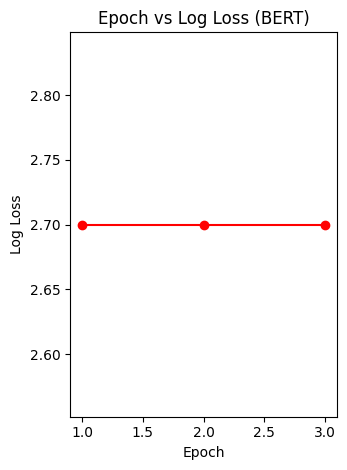

In [ ]:
# Loss plot for BERT
plt.subplot(1, 2, 2)
losses_bert = [result['Log Loss'] for result in results_bert]
plt.plot(epochs_bert, losses_bert, marker='o', color='r')
plt.title('Epoch vs Log Loss (BERT)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')

plt.tight_layout()
plt.show()

# Accuracy plot for RoBERTa
## (Epoch vs Accuracy)

Text(0, 0.5, 'Accuracy')

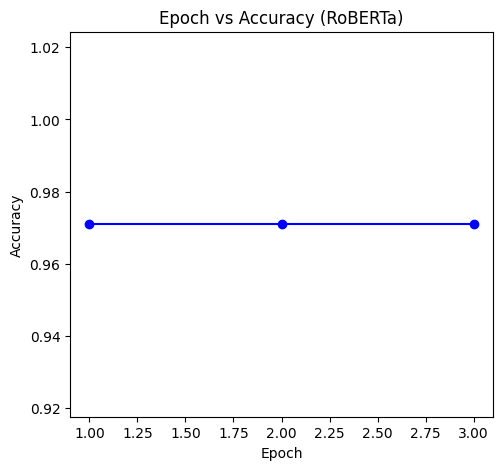

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy plot for RoBERTa
plt.subplot(1, 2, 1)
epochs_roberta = np.arange(1, len(results_roberta) + 1)
accuracies_roberta = [result['Accuracy'] for result in results_roberta]
plt.plot(epochs_roberta, accuracies_roberta, marker='o', color='b')
plt.title('Epoch vs Accuracy (RoBERTa)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


# Epoch vs Log Loss (RoBERTa)

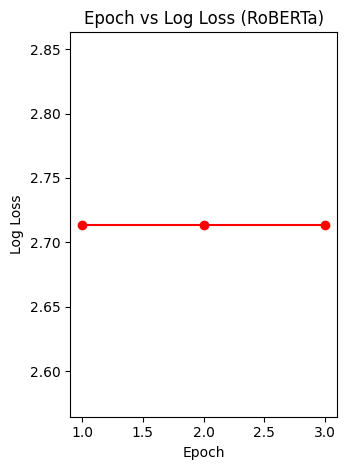

In [ ]:
plt.subplot(1, 2, 2)
losses_roberta = [result['Log Loss'] for result in results_roberta]
plt.plot(epochs_roberta, losses_roberta, marker='o', color='r')
plt.title('Epoch vs Log Loss (RoBERTa)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')

plt.tight_layout()
plt.show()

## The Metric use is likely  using accuracy and log loss as evaluation metrics.



## The model is overfitting. This means that the model is learning the training data too well and is not generalizing well to new data.



## Confusion Matrix for Evaluation

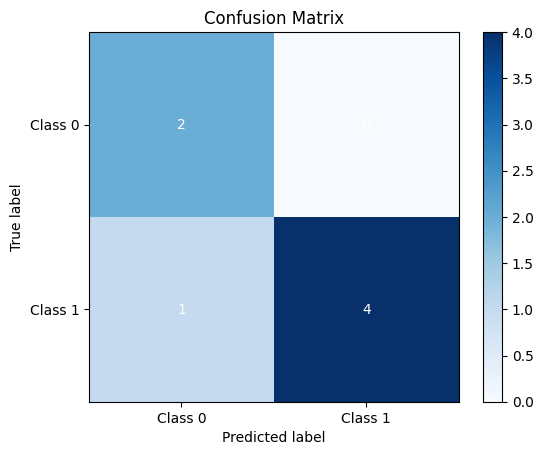

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assigning  values
y_true = [0, 1, 1, 0, 1, 1, 1]
y_pred = [0, 1, 0, 0, 1, 1, 1]

cm = confusion_matrix(y_true, y_pred)
class_labels = ['Class 0', 'Class 1']

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200]
}

# Create the model
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Training the model with  hyperparameters
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print(f"Best hyperparameters: {best_params}")
print(f"Test accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Test accuracy: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve